# A notebook using Pandas to compute streamflow statistics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('boise_river_at_twin_springs.csv', header=None, names=['date','flow'])

In [4]:
df

,date,flow
0,1999-10-01,372
1,1999-10-02,366
2,1999-10-03,367
3,1999-10-04,366
4,1999-10-05,361
...,...,...
4378,2011-09-26,366
4379,2011-09-27,368
4380,2011-09-28,364
4381,2011-09-29,360


### Plot the streamflow vs date
note that we haven't told pandas to convert date to a datetime datatype, so pandas treats it as a string

Text(0, 0.5, 'CFS')

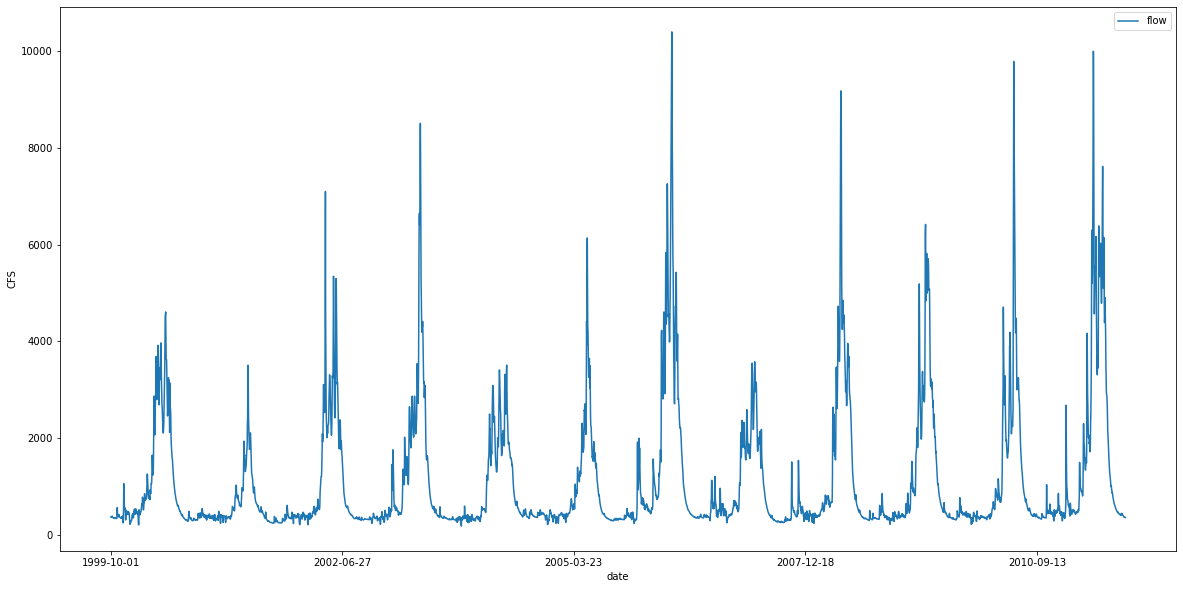

In [5]:
ax=df.plot(x='date', y='flow', kind='line', figsize=(20,10))
ax.set_ylabel("CFS")

#### Lets convert the string to a proper datetime type that pandas can work with
we'll add it as a new column, it could also be written in place of the original

In [6]:
df['dt64']= pd.to_datetime(df.date)

#### Now we can do cool aggregations using date parts like year
Let's get the total flow for each year

In [47]:
df['flow'].groupby(df.dt64.dt.year).sum()

dt64
1999     36604
2000    388278
2001    215139
2002    369983
2003    417567
2004    342965
2005    317055
2006    564735
2007    334320
2008    435717
2009    432941
2010    408712
2011    551927
Name: flow, dtype: int64

#### Here we can calculuate peak flow for each year

In [48]:
df['flow'].groupby(df.dt64.dt.year).max()

dt64
1999     1060
2000     4610
2001     3510
2002     7100
2003     8510
2004     3510
2005     6140
2006    10400
2007     3580
2008     9180
2009     6420
2010     9790
2011    10000
Name: flow, dtype: int64

#### Calculate and plot the average monthly flow for each of the years

In [8]:
monthly_avg_data = df['flow'].groupby([df.dt64.dt.year, df.dt64.dt.month]).mean()
monthly_avg_data

dt64  dt64
1999  10       372.451613
      11       432.766667
      12       389.516129
2000  1        437.806452
      2        606.068966
                 ...     
2011  5       5142.903226
      6       5394.000000
      7       2531.612903
      8        640.354839
      9        406.866667
Name: flow, Length: 144, dtype: float64

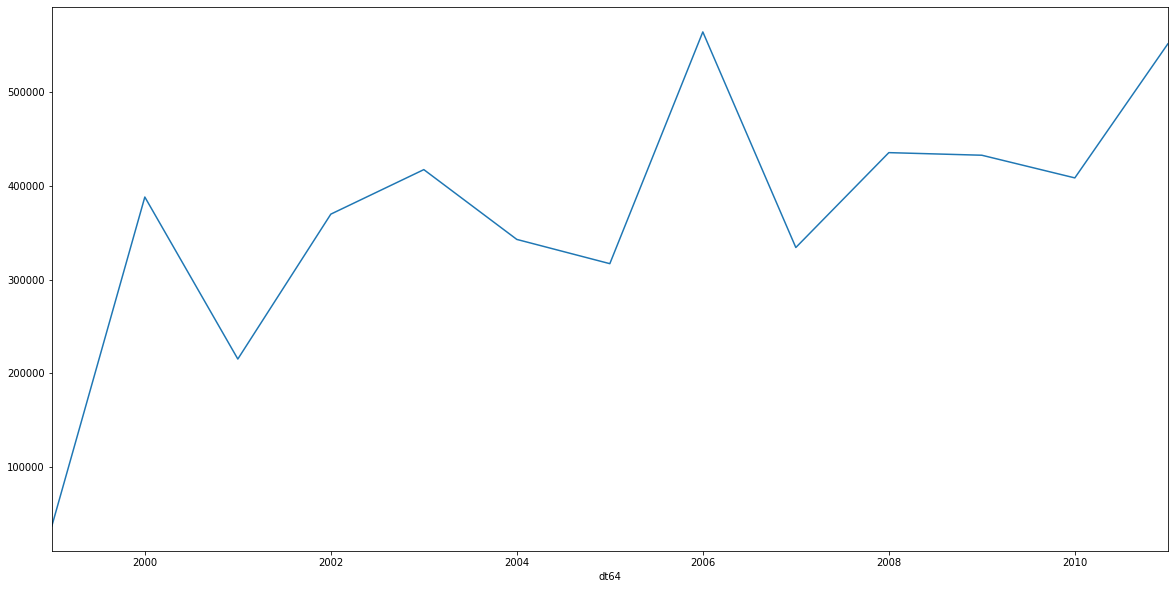

In [46]:
ax = df['flow'].groupby(df.dt64.dt.year).sum().plot(x='date', y='flow', kind='line', figsize=(20,10))
ax